/home/romuald/ENSEIGNEMENT/0-JupyterNotebooks/pyPhysChem



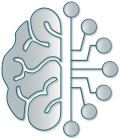

**Start at:** Tuesday 24 September 2024, 13:26:24  
**Hostname:** insa-12842 (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [105]:
import os
import sys

# commenter les lignes ci-dessous si vous n'exécutez pas le notebook dans l'environnement pyPhysChem
print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import fg,bg,hl,color
vID.init(cwd0)
import tools4pyPhysChem as t4pPC

__author__ = "romuald.poteau@univ-tlse3.fr"
__version__ = "20240924"

# Chimie Théorique et Modélisation : modèles simples<br>Feuilles de calcul Python

## À qui ce notebook est-il destiné et comment travailler avec ?

<div class="intro">

Ce notebook Python est destiné à tou(te)s les étudiant(e)s qui suivent un enseignement d'introduction à l'"atomistique et la liaison chimique", qu'on préfère intituler les **modèles simples en chimie théorique et modélisation**. 

**Vous pensez qu'avoir des compétences en Python est sans intérêt pour vous ?** C'est une **erreur**, Python étant ***a minima* une super calculatrice scientifique**. 
Acquérir une maîtrise de Python représente un avantage incontournable pour tout(e) étudiant(e) en sciences, en lui fournissant les **compétences techniques** indispensables pour stimuler la réflexion et l'innovation dans son domaine scientifique. Mais maîtriser Python ne se limite pas à développer des compétences techniques, cela peut vous permettre également de **mieux comprendre un domaine** en approfondissant l'analyse des données, en explorant de **nouvelles approches méthodologiques et numériques**, et en **visualisant des phénomènes complexes** sous des angles inédits. Bref, ça peut vous **aider à comprendre** et à **vous poser des questions différemment**.

Tout(e) étudiant(e) curieux(se) peut s'approprier toutes les parties du notebook. Néanmoins, voici comment vous pourriez **sélectionner les parties qui sont les plus adaptées à votre parcours**, selon que vous êtes dans un parcours...

- **chimie** ou **physico-chimie** : concentrez-vous avant tout sur les applications numériques, sur les outils de résolution numériques d'équations, sur les graphiques, sur l'utilisation de "macrocommandes" en sachant lire "la doc" pour appeler la commande avec les bons paramètres
- **informatique** : Développer du code sans comprendre le contexte utilisateur est insuffisant. Au-delà de cette première approche, des fonctions et classes Python sont intégrées au notebook, afin de faciliter l'utlisation de certaines bibliothèques ou de dépasser leurs limites. Analysez le code, qui exploite le caractère orienté objet du langage Python, et qui - modestement - essaie d'automatiser des processus et de créer des applications logicielles performantes. Et ne passez pas à côté des applications numériques, pour vous aider à aborder différemment le domaine de la chimie. 
- **mathématiques** : les parties exploitant `sympy`, bibliothèque qui facilite le calcul symbolique, sont faites pour vous. Ne négligez cependant pas les parties  numériques ni la partie analyse du code Python si vous êtes attiré(e) par les mathématiques appliquées.
- **physique** : simuler et comprendre des phénomènes physiques nécessitant entre autres de résoudre des équations complexes et d'analyser des données expérimentales, vous pouvez essayer de vous approprier l'ensemble des exercices
- **sciences de l'ingénieur ou prépa concours** : vous serez régulièrement confrontés à la nécécessité de résoudre de façon optimale des problèmes complexes, d'automatiser des calculs et d'analyser des données dans divers domaines de l'ingénierie. Avoir des compétences numériques, en programmation, et en manipulation des données est incontournable. Des compétences en calcul symbolique (bibliothèque `sympy`) sont un plus.

<div style="color:#4a7d93">
    
**Les compétences travaillées seront précisées en fin de chaque exercice.**

</div>

Dans l'environnement `pyPhysChem`, les exercices apparaissent sur fond bleu, comme dans l'exemple ci-dessous
</div>
<br>
<div class="ex" title="lorem ipsum">

*Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Maecenas porttitor congue massa. Fusce posuere, magna sed pulvinar ultricies, purus lectus malesuada libero, sit amet commodo magna eros quis urna. Nunc viverra imperdiet enim. Fusce est. Vivamus a tellus. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Proin pharetra nonummy pede. Mauris et orci. Aenean nec lorem. In porttitor. Donec laoreet nonummy augue. Suspendisse dui purus, scelerisque at, vulputate vitae, pretium mattis, nunc. Mauris eget neque at sem venenatis eleifend. Ut nonummy.*

Mais d'où sort cette phrase ?

<div style="color:#4a7d93">

**Compétences travaillées :** rechercher l'origine du *lorem ipsum* et quelle est son utilisation dans le monde numérique.
</div>
</div>

## Importation des constantes fondamentales

### Introduction

<div class="intro">

En chimie, on a fréquemment besoin d'utiliser des [constantes physiques](https://en.wikipedia.org/wiki/Physical_constant), telles que la vitesse de la lumière $c$, la masse du proton $m_p$, le nombre d'Avogadro $N_A$, la constante de Planck $h$, la constante des gaz parfaits $R$, etc...

Une constante physique est une quantité physique dont la valeur numérique est fixe. Contrairement à une constante mathématique, elle implique une grandeur physiquement mesurable.

On a souvent besoin également de certaines [constantes mathématiques](https://en.wikipedia.org/wiki/Mathematical_constant), comme le nombre $\pi$, le nombre d'Euler $e$, l'unité imaginaire $i$, etc...

La plupart de ces constantes sont disponibles dans la bibliothèque `SciPy`, qui est l’une des bibliothèques de Python permettant de faire le calcul scientifique. Celle-ci dépend de la bibliothèque `NumPy` qui permet la manipulation des tableaux à *N* dimensions. La liste des constantes et des unités est disponible dans la [documentation en ligne de](https://docs.scipy.org/doc/scipy/reference/constants.html#scipy.constants.physical_constants) `SciPy`, ou bien par l'utilisation d'une commande Python. Pour y accéder, il faut importer `scipy.constants`.

</div>
<br>
<div class="rqT" title="SciPy ? A quoi ça sert ?">

`SciPy` est une bibliothèque open-source en Python utilisée pour les calculs scientifiques et techniques. Elle fournit des outils pour l'optimisation, l'intégration, l'interpolation, l'algèbre linéaire, les statistiques, et d'autres domaines des mathématiques appliquées. Voir l'article de [wikipedia](https://fr.wikipedia.org/wiki/SciPy) et le [site du projet](https://scipy.org/). **Elle est utile dans <u>tous</u> les domaines scientifiques**.
</div>
<br>
<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées dans cette section**:</u>

- importer des bibliothèques existantes et exploiter les fonctions incluses
- faire appel au *i*ème élément (`[i]`) d'une liste, d'un multiplet, ou d'un tableau
- afficher le contenu d'une variable à l'aide de la commande `print`
- lire une documentation en ligne en anglais
</div>

In [2]:
import scipy.constants as sc

### Valeur, unité et précision d'une constante fondamentale

<div class="intro">
    
Prenons l'exemple de la masse de l'électron, dont on lit dans la  [documentation en ligne de](https://docs.scipy.org/doc/scipy/reference/constants.html) `SciPy`, que la clef qui indexe $m_e$ est `electron mass`. On va afficher sa valeur, son unité, et l'incertitude *absolue* de cette constante, renvoyées sous forme de multiplet (*tuple* en anglais) de 3 valeurs.
</div>

In [3]:
print(sc.physical_constants["electron mass"])

(9.1093837015e-31, 'kg', 2.8e-40)


<div class="intro">

Dans un premier temps, on va se contenter de stocker la constante dans une variable.
</div>

In [4]:
me = sc.physical_constants["electron mass"][0]
print(me)

9.1093837015e-31


<div class="intro">

**Un mot sur l'incertitude du module `physical_constants` de `SciPy`.** C'est une incertitude absolue qui est contenue dans le 3ème terme du multiplet. Pour rappel, on écrit la valeur d'une mesure avec son incertitude absolue selon la relation :
    
$$m_{\mathrm{e}}\pm\Delta m_{\mathrm{e}}$$

ce qui veut dire que $m_{\mathrm{e}}$ est en réalité compris entre deux valeurs $m_{\mathrm{e}} - \Delta m_{\mathrm{e}}$ et $m_{\mathrm{e}} + \Delta m_{\mathrm{e}}$ :
</div>

<div class="intro">
</div>

In [5]:
me_p = sc.physical_constants["electron mass"][2]
me_u = sc.physical_constants["electron mass"][1]
print("Masse de l'électron = ",me,"±",me_p,me_u)

Masse de l'électron =  9.1093837015e-31 ± 2.8e-40 kg


### Affichage des constantes puis importation de leurs valeurs dans des variables

In [6]:
print(f'Constante de Planck, h: {sc.physical_constants["Planck constant"]}')
print()
print(f'Charge élémentaire, e: {sc.physical_constants["elementary charge"]}')
print()
print(f'Vitesse de la lumière dans la vide, c: {sc.physical_constants["speed of light in vacuum"]}')
print()
print(f'Masse de l\'électron, me: {sc.physical_constants["electron mass"]}')
print()
print(f'Masse du proton, mp: {sc.physical_constants["proton mass"]}')
print()
print(f'Masse du neutron, mn: {sc.physical_constants["neutron mass"]}')


Constante de Planck, h: (6.62607015e-34, 'J Hz^-1', 0.0)

Charge élémentaire, e: (1.602176634e-19, 'C', 0.0)

Vitesse de la lumière dans la vide, c: (299792458.0, 'm s^-1', 0.0)

Masse de l'électron, me: (9.1093837015e-31, 'kg', 2.8e-40)

Masse du proton, mp: (1.67262192369e-27, 'kg', 5.1e-37)

Masse du neutron, mn: (1.67492749804e-27, 'kg', 9.5e-37)


In [7]:
h = sc.physical_constants["Planck constant"][0]
e = sc.physical_constants["elementary charge"][0]
c = sc.physical_constants["speed of light in vacuum"][0]
me = sc.physical_constants["electron mass"][0]
mp = sc.physical_constants["proton mass"][0]
mn = sc.physical_constants["neutron mass"][0]

<div class="ex" title="Nombre d'Avogadro">

**1.** Afficher la valeur du nombre d'Avogadro, son incertitude et son unité, qui sont disponibles dans la bibliothèque `SciPy`

**2.** Sauver la valeur du nombre d'Avogadro dans une variable `NA`, <u>sans utiliser un copier-coller</u>

**3.** Afficher le contenu de la variable `NA` en écrivant : Nombre d'Avogadro = *valeur unité*

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- lire une documentation en ligne en anglais (la [liste des constantes physiques de `SciPy`](https://docs.scipy.org/doc/scipy/reference/constants.html#scipy.constants.physical_constants))
- importer des bibliothèques existantes et exploiter les fonctions incluses
- sauver une valeur numérique dans une variable
- afficher le contenu d'une variable, en contextualisant
</div>
</div>

In [8]:
import scipy.constants as sc

# sur la page physical_constants de SciPy on voit que le nombre d'Avogadro est adressable par le nom "Avogadro constant"

## Question 1
print(sc.physical_constants["Avogadro constant"])

## Question 2
NA = sc.physical_constants["Avogadro constant"][0]

## Question 3
NA_unite = sc.physical_constants["Avogadro constant"][1]
print("Nombre d'avogadro = ",NA,NA_unite)

(6.02214076e+23, 'mol^-1', 0.0)
Nombre d'avogadro =  6.02214076e+23 mol^-1


## Quelques rappels mathématiques importants

### Chiffres significatifs

<div class="intro">

Reprenons l'introduction de l'[article de wikipedia](https://fr.wikipedia.org/wiki/Chiffre_significatif) à ce sujet : *le nombre de chiffres significatifs indique la précision d'une mesure physique. Il s'agit des chiffres connus avec certitude ou compris dans un intervalle d'incertitude. La précision (ou l'incertitude) avec laquelle on connaît la valeur d'une grandeur dépend de la mesure, c'est-à-dire de l'ensemble d'opérations ayant pour but de déterminer la valeur d'une grandeur.*

*<u>Exemple</u> : 12 345 a cinq chiffres significatifs. Son premier chiffre incertain est le 5. Cet exemple est équivalent à 12 345 ± 1 ou encore 12 345(1)*

<u>Exemple</u>  : *m* = 100,0016 g avec une incertitude de 0,0011 g = 100,0016(11) g = 100,0016 ± 0,0011 g
</div>

<div class="intro">
    
Il existe une bibliothèque Python, `sigfig` qui peut assister le scientifique dans **l'affichage** des variables avec un nombre de chiffres significatifs défini par l'utilisateur. La fonction qui nous intéresse s'appelle `round`, dont des exemples sont donnés ci-dessous.
</div>
<br>
<div class="rq">
    
`sigfig` n'étant pas fourni avec une distribution Python standard, il faut d'abord l'installer, par exemple avec la commande `pip`, qu'on peut lancer directement depuis le notebook.
</div>

In [9]:
#!pip install sigfig # enlever le commentaire la première fois que vous exécutez cette cellule, si votre distribution Python n'intègre pas sigfig

from sigfig import round
print(round(me,me_p))
print(round(me,me_p,format='Drake'))
print()
print(round(me,me_p,notation='scientific'))

0.0000000000000000000000000000009109383702 ± 0.0000000000000000000000000000000000000003
0.000 000 000 000 000 000 000 000 000 000 910 938 370 15(28)

9.109383702E-31 ± 0.000000003E-31


<div class="rq">

    
- `sigfig` ne permet malheureusement pas de combiner le format Drake et la notation scientfique
- pour définir le nombre de décimales, on peut utliiser fonction `round` de `NumPy` ou bien celle de `sigfig` avec l'option `decimals` :

```Python
import numpy as np
np.round(12.542352,2) #arrondit à deux décimales = 12.54
```
<br>

```Python
from sigfig import round
round(12.542352,decimals = 2) #arrondit à deux décimales = 12.54
```

</div>

<div class="ex" title="Chiffres significatifs">

**1.** Écrire les nombres A ci-dessous  avec le même nombre de chiffres significatifs que le nombre B qui lui est associé

- A = 12,876782320 ; B = 3,1416
- A = 125678,000034 ; B = 0,000056

**2** Exprimer chaque nombre ci-dessous en tenant compte du nombre de chiffres significatifs (cs) demandé

- 0,006738 ; 3 cs
- 43,715 &times;  10<sup>3</sup> ; 4 cs (utiliser la notation scientifique)

**3** Effectuez les opérations suivantes en tenant compte des chiffres significatifs. Ne pas oublier d'afficher l'unité !

- 1,20 x 10<sup>2</sup> V x 2,5 A
- 0,288 g / 0,4 cm<sup>3</sup>
- 10,8 g + 0,125 g + 4,25 g
- 1,5 x 10<sup>3</sup> mL - 3 x 10<sup>2</sup> mL

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- installer une bibliothèque Python afin d'ajouter des fonctionnalités à sa distribution de base
- importer des bibliothèques existantes et exploiter les fonctions incluses
</div>
</div>

In [10]:
#!pip install sigfig # enlever le commentaire la première fois que vous exécutez cette cellule, si votre distribution Python n'intègre pas sigfig

from sigfig import round

## Question 1

# .1416 : 5 cs
print(round(12.876782320,5))

# 0.000056 : 2 cs
print(round(125678.000034,2))
# on peut préférer une notation scientifique
print(round(125678.000034,2,notation='scientific'))

12.877
130000.0
1.3E5


In [11]:
## Question 2

print(round(0.006738,3))
print(round(43.715e5,4,notation='scientific'))

0.00674
4.372E6


In [12]:
## Question 3. Python et son module sigfig ne peuvent pas vous assister. C'est à vous de connaître la gestion des chiffres significatifs

# Rappels : 
# multiplications et divisions : c’est toujours "le plus petit qui l’emporte"
# additions et soustractions :  le résultat ne doit pas avoir plus de décimales que le nombre qui en comporte le moins (1,07 + 16,0 = 17,07 → 17,1)

print(round(1.2e2 * 2.5, 2),"W") #P=UI
print(round(0.288 / 0.4,1),"g cm-3")
print(round(10.8 + 0.125 + 4.25,decimals=1),"g")
print(round(1.5e3 - 3e2,decimals=1),"mL")

300.0 W
0.7 g cm-3
15.2 g
1200.0 mL


### développement en cours (à suivre...)

## Chapitre 1 : Pré-requis et généralités

### Isotopes et abondance natutelle

#### Résolutions numériques

<div class="ex" title="Masse molaire du lithium naturel">

Selon les tables de données atomiques, il existe 5 isotopes du lithium :

| isotope | *M* / g.mol<sup>-1</sup> | *t*<sub>1/2</sub> / s |
|:-------------:|:-------------|:-------------:|
|<sup>6</sup>Li|	6,015 122 3(5)|stable|
|<sup>7</sup>Li|	7,016 004 0(5)|stable|
|<sup>8</sup>Li|	8,022486|0,84|
|<sup>9</sup>Li|	9,026789|0,178|
|<sup>11</sup>Li|11,04379|0,0087|

Or, le spectre de masse du lithium naturel, ci-dessous, ne présente que deux pics :

<img src="MiscImages/Exercises/spectreMasse-Li.png" style="margin-left:auto; margin-right:auto; display: block; width:200px" id="img_massSpLi" alt="spectre de masse de Li"/>

**1.** Quelle est la masse molaire du lithium à l'état naturel ?

**2.** Afficher le résultat avec le nombre de chiffres significatifs approprié, ainsi qu'avec l'unité

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- calculer avec Python
- importer des bibliothèques existantes et exploiter les fonctions incluses
</div></div>

In [13]:
## Question 1
M6 = 6.0151223
M7 = 7.0160040
p6 = 7.59
p7 = 92.41

M = (p6*M6 + p7*M7)/100
print(M)

6.940037078969999


In [14]:
## Question 2
from sigfig import round
print("masse du lithium naturel = ",round(M,4,format="Drake"),"g/mol")

masse du lithium naturel =  6.940 g/mol


<div class="ex" title="Abondance naturelle des isotopes de l'élément bore">
Le bore naturel (Z=5) est constitué de 2 isotopes : <sup>10</sup>B et <sup>11</sup>B  dont les masses molaires sont respectivement égales à M<sub>1</sub> = 10,0129 g.mol<sup>-1</sup> et M<sub>2</sub> = 11,0093 g.mol<sup>-1</sup>.
    
**1.** Sachant que la masse molaire du bore naturel est M = 10,8110 g.mol<sup>-1</sup>, quelles sont les proportions relatives de ces deux isotopes dans le bore naturel, que l'on notera p<sub>1</sub> et p<sub>2</sub> ?

**2.** Ecrire p1 et p2 avec le nombre de chiffres significatifs approprié. On utilisera pour cela la fonction `round` de la [bibliothèque `sigfig`](https://pypi.org/project/sigfig/)

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- calculer avec Python
- importer des bibliothèques existantes et exploiter les fonctions incluses
- appliquer des méthodes numériques pour résoudre un système d'équations
</div>
</div>
<br>

<div class="hint">

- on recherche deux inconnues, p1 et p2. Il faut formuler un système de deux équations à deux inconnues. Dans ce cas, le système s'exprime comme :
$$p_1M_1 + p_2M_2 = M$$
$$p_1 + p_2 = 1$$

- puis il faut résoudre le système. On va utiliser la fonction `solve` de `numpy`. Il faut d'abord transformer le système ci-dessus en tableaux
    - le premier va contenir les valeurs associées aux inconnues p1 et p2 dans la partie gauche de ces deux équations
$$A=\left[\begin{array}{cc}
M_{1} & M_{2}\\
1 & 1
\end{array}\right]$$
    - le second va contenir les valeurs de la partie droite des équations
$$y=\left[\begin{array}{c}
M\\
1
\end{array}\right]$$

Ces deux tableaux doivent être exprimés sous forme de tableaux `numpy`
</div>

In [15]:
## Question 1
M1 = 10.0129
M2 = 11.0093
M = 10.8110

In [16]:
import numpy as np

A = np.array([
             [M1,M2],
             [1,1]
             ])
y = np.array([M,1])
print(A)
print()
print(y)

[[10.0129 11.0093]
 [ 1.      1.    ]]

[10.811  1.   ]


In [17]:
p = np.linalg.solve(A, y)
print(p*100)

[19.90164593 80.09835407]


<div class="rq">

C'est à vous de gérer la précision, c'est-à-dire le nombre de chiffres significatifs, compte tenu de la précision des données. La bibliothèque `sigfig` peut ensuite être utilisée pour vous aider à afficher les abondances naturelles avec le nombre de chiffres significatifs appoprié, c'est-à-dire 6 dans cette application. 
</div>

In [18]:
## Question 2

from sigfig import round
p1 = round(100*p[0],4,format="Drake")
p2 = round(100*p[1],4,format="Drake")
print("p1 =",p1)
print("p2 =",p2)

p1 = 19.90
p2 = 80.10


#### Résolution analytique

<div class="intro">
    
On va utiliser un programme CAS (Computer Algebra System), c'est-à-dire un logiciel utilisé pour effectuer des calculs algébriques symboliques, comme la manipulation d'expressions mathématiques, la résolution d'équations, et le calcul de dérivées et d'intégrales, de manière exacte plutôt que numérique.

On va plus précisément utiliser pour cela la [bibliothèque Python `SymPy`](https://www.sympy.org/). Elle permet de manipuler des expressions mathématiques sous forme symbolique plutôt que numérique. Les outils d'algèbre symbolique sont particulièrement utiles dans le contexte de l'enseignement, de la recherche, ou du développement d'outils mathématiques où il est nécessaire de manipuler des expressions mathématiques de manière exacte, plutôt que d'avoir recours à des approximations numériques.

Ce sont des compétences Python qu'il est utile de maîtriser en mathématiques, physique, sciences de l'ingénieur. Ce n'est pas si compliqué, dans une première approche, rien n'interdit aux chimistes et physico-chimistes d'essayer de comprendre ce qui va être fait.
</div>
<br>
<div class="intro">

**Mode d'emploi :**
    
- si `SymPy` n'est pas encore installé, vous pouvez l'ajouter en exécutant la commande suivante dans une cellule du notebook :  `!pip install sympy`
- vous devez importer la bibliothèque. Pourquoi ne pas lui attribuer un raccourci : `import sympy as sym`

Supposons que vous devez résoudre le système suivant

$$\begin{align*}
2x + 3y &= 6 \\
x - y &= 2
\end{align*}$$

- il vous faut d'abord déclarer les variables symboliques, qui sont ici *x* et *y*

    ```python
    from sympy import symbols
    x, y = symbols('x y')
    ```

- vous pouvez ensuite définir vos équations, avec la fonction `Eq()` de `SymPy`. Par exemple, `Eq(2*x + 3*y, 6)` représente l'équation $2x+3y=6$ 

    ```python
    from sympy import Eq
    eq1 = Eq(2*x + 3*y, 6)
    eq2 = Eq(x - y, 2)
    ```

- utilisez la fonction `solve` de SymPy pour résoudre le système d'équations. Sa syntaxe générale est `solve(equations, variables)`. `equations` peut être une seule équation ou un tuple de plusieurs équations. Idem pour `variables`. Dans ce cas, ça donne

    ```python
    from sympy import solve
    solution = solve((eq1, eq2), (x, y))
    ```

- `solve` retourne un dictionnaire avec les solutions des variables
</div>

In [64]:
from sympy import symbols
x, y = symbols('x y')

from sympy import Eq
eq1 = Eq(2*x + 3*y, 6)
eq2 = Eq(x - y, 2)

from sympy import solve
solution = solve((eq1, eq2), (x, y))

print(solution)

{x: 12/5, y: 2/5}


In [59]:
# !pip install sympy # enlever le commentaire la première fois que vous exécutez cette cellule, si votre distribution Python n'intègre pas SymPy

import sympy as sym
p1,p2 = sym.symbols('p1,p2')
M1,M2,M = sym.symbols('M1,M2,M')
eq1 = sym.Eq(p1*M1+p2*M2,M)
eq2 = sym.Eq(p1+p2,1)
sol = sym.solve([eq1,eq2],(p1,p2))
print(sol)
print(sol[p1])
print(sol[p2])

sol[p1]
sol[p2]

print()
M1_ = 10.0129
M2_ = 11.0093
M_ = 10.8110

p1_ = sol[p1].subs({M1:M1_, M2: M2_, M: M_})
p2_ = sol[p2].subs({M1:M1_, M2: M2_, M: M_})
print("p1 = ",p1_)
print("p2 = ",p2_)

print()
p1_ = round(100*p1_,4,format="Drake")
p2_ = round(100*p2_,4,format="Drake")
print("p1 = ",p1_)
print("p2 = ",p2_)

{p1: (M - M2)/(M1 - M2), p2: (-M + M1)/(M1 - M2)}
(M - M2)/(M1 - M2)
(-M + M1)/(M1 - M2)

p1 =  0.199016459253312
p2 =  0.800983540746688

p1 =  19.90
p2 =  80.10


## Chapitre 3 : Atomes et orbitales atomiques (OA)

### Atome d'hydrogène

<div class="ex" title="Atome d'hydrogène : niveaux d'énergie">

On rappelle que *Z*=1 et *A*=1 pour H et que l'énergie électronique est donnée par la formule :

$$E_{n}(\mathrm{H})=-\frac{E_{i_{1}}(\mathrm{H})}{n^{2}}$$

où *n* est le nombre quantique principal et où $E_{i_{1}}(\mathrm{H})$, l'énergie d'ionisation de H, vaut 13,598 eV.

**1.** $E_{i_{1}}(\mathrm{H})$ peut être calculée en appliquant la formule ci-dessous

$$E_{i_{1}}=\frac{1}{8}\frac{\mu_{\mathrm{H}}e^{4}}{\left(h\times\varepsilon_{0}\right)^{2}}$$

où : 
- *h* est la constante de Planck
- $\varepsilon_{0}$ ("epsilon zéro") est la permittivité du vide ou encore la constante (di)électrique
- *e* est la charge élémentaire
- $\mu_{\mathrm{H}}$ est la masse réduite de <u>un</u> atome d'hydrogène, calculée par la formule :

$$\mu_{\mathrm{H}}=\frac{m_{e}m_{p}}{m_{e}+m_{p}}$$

**1.** Afficher les constantes fondamentales *h*, $\varepsilon_{0}$, $m_{e}$, $m_{p}$ et *e* de la bibliothèque `scipy`, leur précision et leur incertitude absolue. Puis sauver leurs valeurs dans des variables `h`, `eps0`, `me`, `mp`, `e`.

**2.** Utiliser ces variables pour retrouver la valeur de l'énergie d'ionisation de H en eV.

**3.** Calculer, en eV, les énergies des 10 premiers états de l'atome d'hydrogène. Utiliser la fonction `round(x,m)` de `numpy` pour arrondir les énergies à 3 décimales (`m`=3)

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- calculer avec Python
- importer des bibliothèques existantes et exploiter les fonctions ou données incluses
- maîtriser une boucle afin d'automatiser un traitement de données

</div>
</div>
<br>
<div class="hint">

- la constante électrique du vide $\varepsilon_{0}$ est indexée dans `scipy` sous le nom de `vacuum electric permittivity`
- calculer d'abord $\mu_{\mathrm{H}}$ et sauver la valeur dans une variable `muH`
- utiliser la grandeur physique appropriée de `scipy` pour faire la conversion de joule en eV
- utiliser une boucle pour répondre à la question 2
</div>

In [19]:
import scipy.constants as sc
## Question 1

# affichages
print(f'Constante de Planck, h: {sc.physical_constants["Planck constant"]}')
print()
print(f'Masse de l\'électron, me: {sc.physical_constants["electron mass"]}')
print()
print(f'Masse du proton, mp: {sc.physical_constants["proton mass"]}')
print()
print(f'Permittivité du vide, eps0: {sc.physical_constants["vacuum electric permittivity"]}')
print()
print(f'Charge élémentaire, e: {sc.physical_constants["elementary charge"]}')

# sauvegarde des valeurs des grandeurs physiques dans des variables
h = sc.physical_constants["Planck constant"][0]
me = sc.physical_constants["electron mass"][0]
mp = sc.physical_constants["proton mass"][0]
eps0 = sc.physical_constants["vacuum electric permittivity"][0]
e = sc.physical_constants["elementary charge"][0]

Constante de Planck, h: (6.62607015e-34, 'J Hz^-1', 0.0)

Masse de l'électron, me: (9.1093837015e-31, 'kg', 2.8e-40)

Masse du proton, mp: (1.67262192369e-27, 'kg', 5.1e-37)

Permittivité du vide, eps0: (8.8541878128e-12, 'F m^-1', 1.3e-21)

Charge élémentaire, e: (1.602176634e-19, 'C', 0.0)


In [20]:
## Question 2

muH = me*mp/(me+mp)
Ei1 = muH*e**4 / (8*(h*eps0)**2)

print("muH =",muH,"kg")
print()
print("Ei1 =",Ei1,"J")
print("Ei1 =",Ei1/e,"eV")

muH = 9.104425276523571e-31 kg

Ei1 = 2.1786858117086946e-18 J
Ei1 = 13.598287264178731 eV


In [21]:
## Question 3

Ei1_eV = Ei1/e
for n in range(1,11):
    En = -Ei1_eV/n**2
    print("n =",n,": E = ",np.round(En,3),"eV")

n = 1 : E =  -13.598 eV
n = 2 : E =  -3.4 eV
n = 3 : E =  -1.511 eV
n = 4 : E =  -0.85 eV
n = 5 : E =  -0.544 eV
n = 6 : E =  -0.378 eV
n = 7 : E =  -0.278 eV
n = 8 : E =  -0.212 eV
n = 9 : E =  -0.168 eV
n = 10 : E =  -0.136 eV


<div class="ex" title="Atome d'hydrogène : transitions électroniques">

**1.** La relation de Planck-Einstein est une relation de base de la mécanique quantique. Elle permet de calculer l'énergie transportée par un photon : $E=h\nu$, où :

- E est l'énergie du photon (en joules)
- h est la constante de Planck (en J⋅s)
- $\nu$ ("nu") est la fréquence (en hertz) de l'onde électromagnétique associée au photon considéré

Dans le cas d'une onde électromagnétique se propageant dans le vide, fréquence $\nu$ ("nu") et longueur d'onde $\lambda$ ("lambda", en mètres) sont liées par la relation $\nu = c/\lambda$ 

La relation de Planck-Einstein s'écrit alors

$$E=\frac{hc}{\lambda}$$

c'est-à-dire que connaissant l'énergie d'un photon on peut calculer sa longueur d'onde par

$$\lambda=\frac{hc}{E}$$

On trouve dans certains formulaires de calcul qu'on peut directement calculer la longueur d'onde en nm, à partir d'une énergie exprimée en eV :

$$\lambda[\mathrm{nm}]=\frac{1239,84}{E[\mathrm{eV}]}$$

Retrouver la valeur au numérateur, et la sauver dans une variable `eV2nm` ("eV to nanometers")

**2.** La transition la plus intense du spectre d'émission de l'atome d'hydrogène correspond à la transition 3 &rarr; 2. Calculer, en eV, la différence d'énergie entre les deux états. En déduire la longueur d'onde en nm. Les afficher avec 3 & 1 décimale, respectivement.

**3.** La série de Balmer est la série de raies spectrales de l'atome d'hydrogène correspondant à une transition électronique d'un état quantique de nombre principal *n* &ge; 3 vers l'état *n* = 2. Calculer, en nm, les longueurs d'onde des 6 premières transitions de la série de Balmer, et les afficher avec 1 décimale.

**4.** Faire le même travail pour les séries de Lyman (transitions *n* &ge; 2 vers l'état *n* = 1) et de Brackett (transitions de *n* &ge; 4 vers l'état *n* = 1). Ces raies sont-elles identifiables par un oeil humain ?

</div>
<br>
<div class="hint">

- question 1
    - utiliser à nouveau les constantes fondamentales appropriées de l'exercice précédent, et les compléter si nécessaire
    - 1 nm = 10<sup>-9</sup> m = `1e-9` m
    - &lambda;[m] = &lambda;[nm] &times; `1e9`
    - *E*[J]/*e* = *E*[eV]
- question 2
    - utiliser la valeur de $E_{i_{1}}(\mathrm{H})$ calculée précédemment
    - la relation $\lambda[\mathrm{nm}]={1239,84}/{E[\mathrm{eV}]}$ peut s'appliquer à des différences d'énergie
- question 3
    - définir une fonction `E(n)`, qui renvoie, en eV, l'énergie d'un état quantique de nombre principal *n*
    - utiliser une boucle

$$\lambda[\mathrm{nm}]=\frac{1239,84}{\Delta E[\mathrm{eV}]}$$

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- calculer avec Python
- importer des bibliothèques existantes et exploiter les fonctions ou données incluses
- maîtriser une boucle afin d'automatiser un traitement de données

</div>
</div>
<br>
<div class="rq">

!! `lambda` est une fonction de `Python`. Ne pas l'utiliser comme variable !!
</div>

In [22]:
## Question 1
import scipy.constants as sc

# affichages
print(f'Constante de Planck, h: {sc.physical_constants["Planck constant"]}')
print()
print(f'Vitesse de la lumière dans la vide, c: {sc.physical_constants["speed of light in vacuum"]}')

# pour la conversion J > eV
print()
print(f'Charge élémentaire, e: {sc.physical_constants["elementary charge"]}')

# sauvegarde des valeurs des grandeurs physiques dans des variables
h = sc.physical_constants["Planck constant"][0]
e = sc.physical_constants["elementary charge"][0]
c = sc.physical_constants["speed of light in vacuum"][0]

Constante de Planck, h: (6.62607015e-34, 'J Hz^-1', 0.0)

Vitesse de la lumière dans la vide, c: (299792458.0, 'm s^-1', 0.0)

Charge élémentaire, e: (1.602176634e-19, 'C', 0.0)


In [23]:
eV2nm = h*c*1e9/e
print(eV2nm)

1239.8419843320028


In [24]:
## Question 2
E2 = -Ei1_eV/4
E3 = -Ei1_eV/9
DeltaE = E3-E2
print("3 > 2, DeltaE = ",np.round(DeltaE,3),"eV ; lambda = ",np.round(eV2nm/DeltaE,1),"nm")

3 > 2, DeltaE =  1.889 eV ; lambda =  656.5 nm


In [60]:
##########################
h = sc.physical_constants["Planck constant"][0]
me = sc.physical_constants["electron mass"][0]
mp = sc.physical_constants["proton mass"][0]
eps0 = sc.physical_constants["vacuum electric permittivity"][0]
e = sc.physical_constants["elementary charge"][0]
muH = me
Ei1_inf = muH*e**4 / (8*(h*eps0)**2)
Ei1_inf_eV = Ei1_inf/e
print("Ei1 = ",Ei1_inf_eV,"eV")

E2 = -Ei1_inf_eV/4
E3 = -Ei1_inf_eV/9
DeltaE = E3-E2
print("3 > 2, DeltaE = ",np.round(DeltaE,3),"eV ; lambda = ",np.round(eV2nm/DeltaE,1),"nm")


Ei1 =  13.605693122885839 eV
3 > 2, DeltaE =  1.89 eV ; lambda =  656.1 nm


In [61]:
## Question 3
def E(n):
    return -Ei1_eV/n**2

nombre_de_transitions = 6
for n in range(3, 3 + nombre_de_transitions):
    longueur_onde = eV2nm/(E(n)-E(2))
    print(n,"-> 2, lambda = ",np.round(longueur_onde,1),"nm")

3 -> 2, lambda =  656.5 nm
4 -> 2, lambda =  486.3 nm
5 -> 2, lambda =  434.2 nm
6 -> 2, lambda =  410.3 nm
7 -> 2, lambda =  397.1 nm
8 -> 2, lambda =  389.0 nm


In [62]:
## Question 4

print("Lyman")
for n in range(2, 2 + nombre_de_transitions):
    longueur_onde = eV2nm/(E(n)-E(1))
    print(n,"-> 1, lambda = ",np.round(longueur_onde,1),"nm")

print()
print("Brackett")
for n in range(4, 4 + nombre_de_transitions):
    longueur_onde = eV2nm/(E(n)-E(3))
    print(n,"-> 3, lambda = ",np.round(longueur_onde,1),"nm")

Lyman
2 -> 1, lambda =  121.6 nm
3 -> 1, lambda =  102.6 nm
4 -> 1, lambda =  97.3 nm
5 -> 1, lambda =  95.0 nm
6 -> 1, lambda =  93.8 nm
7 -> 1, lambda =  93.1 nm

Brackett
4 -> 3, lambda =  1875.6 nm
5 -> 3, lambda =  1282.2 nm
6 -> 3, lambda =  1094.1 nm
7 -> 3, lambda =  1005.2 nm
8 -> 3, lambda =  954.9 nm
9 -> 3, lambda =  923.2 nm


### Configurations électroniques fondamentales

<div class="intro">

On va utiliser la bibliothèque Python `mendeleev`, qui est un outil conçu pour fournir un accès facile aux données du tableau périodique des éléments et à diverses propriétés atomiques. Elle est nommée en l'honneur de [Dmitri Mendeleïev](https://fr.wikipedia.org/wiki/Dmitri_Mendele%C3%AFev), le chimiste russe qui a créé le premier tableau périodique.

Pour récupérer les informations d'un élément, il faut

- commencer par importer le module `element` de la bibliothèque `mendeleev`
- puis dire quel est l'élément dont on veut connaître les propriétés, en le désignant par son symbole chimique (attention au respect majuscule/minuscule) ou par son numéro atomique, ou par son nom anglais

```Python
from mendeleev import element

chlore = element('Cl')
hydrogène = element(1)
carbone = element('Carbon')
```
<br>

On peut ensuite accéder aux propriétés... si on connaît leur nom. Les données disponibles et leur origine sont indiquées sur la [page data de la documentation](https://mendeleev.readthedocs.io/en/stable/data.html).

Par exemple,

```Python
chlore.econf
```
renvoie la configuration électronique du chlore. On peut aussi l'obtenir directement avec la commande 

```Python
element('Cl').econf
```

</div>
<br>
<div class="rq">

**C'est quoi cette commande `chlore.econf` ? Pourquoi pas `econf(chlore)`?**

c'est lié au fait que Python obéit au principe de la programmation orientée objet. `econf` est un **attribut** de l'objet `chlore`.  Les objets ont des attributs, qui sont des variables associées à l'objet et qui contiennent des données. Dans le plupart des bibliothèques Python, il existe également des fonctions qui s'appliquent aux objets. Supposons qu'il existe une fonction, `cloud`, qui renvoie de quoi dessiner le nuage électronique d'un atome. On l'appelerait comme `chlore.cloud()`. *Notez les parenthèses.* Supposons que cette fonction dessine par défaut le nuage électronique total, mais qu'elle puisse prendre en paramètre le numéro de la couche pour dessiner le nuage électronique de ces électrons-là. On écrirait par exemple, pour la 2ème couche, `chlore.cloud(2)`.
</div>
<br>
<div class="intro">

**Principales commandes**

- `element(X).ec` (*attribut*) : renvoie la CEF complète de l'élément identifié par X, où X = Z ou "symbole atomique" ou "name of the element" 
- `element(X).econf` (*attribut*) : renvoie la CEF de l'élément identifié par X, exprimée à partir de celle du gaz noble de la période précédente . Bizarrement, 1 n'est jamais indiqué quand une sous-couche est occupée par un seul électron. 
- `element(X).ec.unpaired_electrons()` (*fonction*) : calcule et renvoie le nombre d'électrons célibataires de X
- `element(X).ec.ionize(n)` (*fonction*) : renvoie la CEF du cation X^(n+)
- `element(X).oxistates` (*attribut*) : renvoie les états d'oxydation <u>les plus courants</u> de l'élément X
</div>

In [30]:
# !pip install mendeleev # enlever le commentaire la première fois que vous exécutez cette cellule, si votre distribution Python n'intègre pas mendeleev, ce qui est le plus probable
from mendeleev import element
Cu = element(29)
print("CEF de Cu =",Cu.ec,"=",Cu.econf)
print("Nombre d'électrons célibataires de Cu =",Cu.ec.unpaired_electrons())
print("État(s) d'oxydation le(s) plus courant(s) de Cu =",Cu.oxistates)
print("CEF de Cu2+ =",element(29).ec.ionize(2))
print("Nombre d'électrons célibataires de Cu2+ =",Cu.ec.ionize(2).unpaired_electrons())

CEF de Cu = 1s2 2s2 2p6 3s2 3p6 3d10 4s1 = [Ar] 3d10 4s
Nombre d'électrons célibataires de Cu = 1
État(s) d'oxydation le(s) plus courant(s) de Cu = [1, 2]
CEF de Cu2+ = 1s2 2s2 2p6 3s2 3p6 3d9
Nombre d'électrons célibataires de Cu2+ = 1


<div class="ex" title="CEF ">

**1.** Utiliser les données de la bibliothèque `mendeleev` pour afficher la configuration électronique fondamentale (CEF) des éléments ci-dessous, ainsi que leur nombre d'électrons non célibataire. Afficher également le numéro atomique, contenu dans la variable (ou attribut) `atomic_number`, utilisée à la place de `ec` ou de `econf`.

- l'aluminium (Al)
- le calcium (Ca)
- le scandium (Sc)
- le chrome (Cr)

**2.** Afficher les états d'oxydation les plus courants de l'or (Au). Vérifier que Au c'est bien un métal de transition. 

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- importer des bibliothèques existantes et exploiter les fonctions ou données incluses

</div>
</div>

In [31]:
from mendeleev import element

# Question 1
X = element("Al")
print("CEF de Al =",X.ec,"=",X.econf,"  ",X.ec.unpaired_electrons(),"électron(s) célibataire(s). (Z=",X.atomic_number,")")
X = element("Ca")
print("CEF de Ca =",X.ec,"=",X.econf,"  ",X.ec.unpaired_electrons(),"électron(s) célibataire(s). (Z=",X.atomic_number,")")
X = element("Sc")
print("CEF de Sc =",X.ec,"=",X.econf,"  ",X.ec.unpaired_electrons(),"électron(s) célibataire(s). (Z=",X.atomic_number,")")
X = element("Cr")
print("CEF de Cr =",X.ec,"=",X.econf,"  ",X.ec.unpaired_electrons(),"électron(s) célibataire(s). (Z=",X.atomic_number,")")


CEF de Al = 1s2 2s2 2p6 3s2 3p1 = [Ne] 3s2 3p    1 électron(s) célibataire(s). (Z= 13 )
CEF de Ca = 1s2 2s2 2p6 3s2 3p6 4s2 = [Ar] 4s2    0 électron(s) célibataire(s). (Z= 20 )
CEF de Sc = 1s2 2s2 2p6 3s2 3p6 3d1 4s2 = [Ar] 3d 4s2    1 électron(s) célibataire(s). (Z= 21 )
CEF de Cr = 1s2 2s2 2p6 3s2 3p6 3d5 4s1 = [Ar] 3d5 4s    6 électron(s) célibataire(s). (Z= 24 )


In [32]:
# Question 2
X = element("Au")
print("État(s) d'oxydation le(s) plus courant(s) de Au =",X.oxistates)
print("CEF de Au =",X.ec,"=",X.econf,"  ",X.ec.unpaired_electrons(),"électron(s) célibataire(s). (Z=",X.atomic_number,")")
print("CEF de Au3+ =",X.ec.ionize(3),"  ",X.ec.ionize(3).unpaired_electrons(),"électron(s) célibataire(s). (Z=",X.atomic_number,")")

État(s) d'oxydation le(s) plus courant(s) de Au = [1, 3]
CEF de Au = 1s2 2s2 2p6 3s2 3p6 4s2 3d10 4p6 5s2 4d10 5p6 4f14 5d10 6s1 = [Xe] 4f14 5d10 6s    1 électron(s) célibataire(s). (Z= 79 )
CEF de Au3+ = 1s2 2s2 2p6 3s2 3p6 4s2 3d10 4p6 5s2 4d10 5p6 4f14 5d8    2 électron(s) célibataire(s). (Z= 79 )


<div class="rq">

Il est utile de rappeler la définition d'un métal de transition : **Un métal de transition, ou élément de transition, est, selon la définition de l'IUPAC, « un élément chimique dont les atomes ont une sous-couche électronique d incomplète, ou qui peuvent former des cations dont la sous-couche électronique d est incomplète**. [L'article de wikipedia sur le sujet est très bien écrit](https://fr.wikipedia.org/wiki/M%C3%A9tal_de_transition). 

La sous-couche *d* de Au est complète (5*d*<sup>10</sup>), mais Au est bien un métal de transition, puisque Au<sup>3+</sup>, cation connu (donc stable) de Au, possède une sous-couche *d* incomplète (5*d*<sup>8</sup>).
</div>

## Le tableau périodique des éléments

<div class="intro">

On va principalement utiliser la bibliothèque `mendeleev`, et le tableau de données qui est renvoyé par la fonction `create_vis_dataframe()` du package `mendeleev.vis`. Ce tableau contient numéros atomiques, noms des éléments en anglais, noms des familles en anglais, rayons covalents, affinité électronique etc... Il peut ensuite être **utilisé pour dessiner des tableaux périodiques**, par exemple avec `matplotlib`. Mais il y **manque des données** comme les noms en français, les énergies de première ionisation (pourtant disponibles dans la base de données de `mendeleev`) etc. Si on veut franciser `mendeleev` et y transférer certaines données physico-chimique de sa base de données vers ce tableau, il va donc falloir le *patcher*.

Pour simplifier la vie de l'utilisateur, `mendeleev` met à disposition des commandes graphiques pour **visualiser le tableau périodique**. L'une d'entre elles s'appuie sur la bibliothèque **`bokeh`**, qui permet de générer des **visualisations web interactives** directement depuis du code Python. Ca marche aussi dans un environnement de jupyter notebook. `bokeh` ne faisant en général pas partie de la distribution standard, il faut **l'installer à la première utilisation**.

On aimerait de surcroît, pour chaque élément, connaître sa "carte de visite", comme la date de découverte, l'origine du nom, l'utilisation principale etc. Toutes ces données sont contenues dans la base de données de `mendeleev`, mais il faut une commande Python pour afficher chacune de ces informations.
</div>

### Développements d'outils Python

<div class="intro">

L'exercice ci-dessous consiste à analyser un code Python qui a été développé à la fois pour simplifier l'utilisation de `mendeleev` et pour le *patcher*, selon les orientations définies dans l'introduction ci-dessus. 

</div>

<div class="ex" title="Construction d'une classe Python">

Cet exercice s'adresse aux étudiants en informatique et plus généralement à tous ceux et toutes celles d'entre vous qui veulent acquérir la compétence *développement d'outils dans un langage orienté objet*, tel que Python.

On a construit une classe `TableauPeriodique` afin d'amender `mendeleev`:

- avec une partie *pach*  pour ajouter les noms en français, ajouter les énergies d'ionisation dans le tableau qui permet de dessiner le tableau périodique, changer les informations interactives qui se superposent au tableau quand on passe la souris dessus, changer les éléments du groupe 12 en métaux alors que `mendeleev` les classe comme des métaux de transition, etc...
- avec l'introduction d'une nouvelle commande `prop()`

<div style="color:#4a7d93">
    
<u>**Compétences Python travaillées**:</u>
    
- maîtriser la syntaxe et la sémantique de Python afin d'écrire des programmes fonctionnels
- installer une bibliothèque si elle ne fait pas partie de votre environnement Python de base
- importer des bibliothèques existantes et exploiter les fonctions ou données incluses
- maîtriser une boucle afin d'automatiser un traitement de données
- créer des fonctions spécifiques utilisant les fonctions et les classes élémentaires génériques fournies par le langage
- connaître les grands principes de la programmation orientée objet (encapsulation, héritage ...) et les notions associées (constructeur, attributs, méthodes ...) en vue de les mettre en oeuvre en Python afin d'écrire des programmes modulaires et évolutifs
- définir ses propres classes d'objet en vue de créer des objets correspondants parfaitement aux données manipulées
- documenter une classe et ses méthodes en vue d'améliorer sa qualité et sa ré-utilisabiilité

</div>
</div>

In [33]:
# !pip install bokeh # enlever le commentaire la première fois que vous exécutez cette cellule, si votre distribution Python n'intègre pas bokeh, ce qui est le plus probable

In [34]:
class TableauPeriodique:
    nomsFr=['Hydrogène','Hélium','Lithium','Béryllium','Bore','Carbone','Azote','Oxygène',
            'Fluor','Néon','Sodium','Magnésium','Aluminium','Silicium','Phosphore','Soufre',
            'Chlore','Argon','Potassium','Calcium','Scandium','Titane','Vanadium','Chrome',
            'Manganèse','Fer','Cobalt','Nickel','Cuivre','Zinc','Gallium','Germanium',
            'Arsenic','Sélénium','Brome','Krypton','Rubidium','Strontium','Yttrium',
            'Zirconium','Niobium','Molybdène','Technétium','Ruthénium','Rhodium',
            'Palladium','Argent','Cadmium','Indium',
            'Étain','Antimoine','Tellure','Iode','Xénon','Césium','Baryum','Lanthane','Cérium',
            'Praséodyme','Néodyme','Prométhium','Samarium','Europium','Gadolinium','Terbium',
            'Dysprosium','Holmium','Erbium','Thulium','Ytterbium','Lutetium','Hafnium','Tantale',
            'Tungstène','Rhénium','Osmium','Iridium','Platine','Or','Mercure','Thallium','Plomb',
            'Bismuth','Polonium','Astate','Radon','Francium','Radium','Actinium','Thorium','Protactinium',
            'Uranium','Neptunium','Plutonium','Americium','Curium','Berkelium','Californium','Einsteinium',
            'Fermium','Mendelevium','Nobelium','Lawrencium','Rutherfordium','Dubnium','Seaborgium','Bohrium',
            'Hassium','Meitnerium','Darmstadtium','Roentgenium','Copernicium','Nihonium','Flerovium',
            'Moscovium','Livermorium','Tennesse','Oganesson',
            ]
    trad = {'Nonmetals':'Non métal',
            'Noble gases':'Gaz noble',
            'Alkali metals':'Métal alcalin',
            'Alkaline earth metals':'Métal alcalino-terreux',
            'Metalloids':'Métalloïde',
            'Halogens':'Halogène',
            'Poor metals':'Métal pauvre',
            'Transition metals':'Métal de transition',
            'Lanthanides':'Lanthanide',
            'Actinides':'Actinide',
            'Metals':'Métal',
           }

    def __init__(self):
        from mendeleev.vis import create_vis_dataframe
        self.elements = create_vis_dataframe()
        self.patch_elements()

    def patch_elements(self):
        '''
        Ce patch, appliqué à self.elements, créé par l'appel à create_vis_dataframe(), va servir à :
        - ajouter des informations en français : les noms des éléments et des séries (familles) auxquelles ils appartiennent
        - retirer les éléments du groupe 12 de la famille des métaux de transition, qui est le choix CONTESTABLE par défaut de la bibliothèque mendeleev
        input : elements est un dataframe pandas préalablement créé par la fonction create_vis_dataframe() de mendeleev.vis
        output : elements avec deux nouvelles colonnes name_seriesFr et nom, qui contient dorénavant les noms des éléments en français
                        + correction des données name_series et series_id pour les éléments Zn, Cd, Hg, Cn
                        + de nouvelles colonnes qui contiennent l'énergie de première ionisation et les isotopes naturels
        '''
        def series_eng2fr(s):
            '''Correspondance entre nom des séries (familles) en anglais et en français'''
            s = TableauPeriodique.trad[s]
            return s

        def name_eng2fr():
            self.elements["nom"] = TableauPeriodique.nomsFr
            return

        def ajouter_donnees():
            import numpy as np
            from mendeleev.fetch import fetch_table
            import pandas as pd
            dfEi = fetch_table('ionizationenergies')
            dfEi1 = dfEi.query("degree == 1")
            b = pd.DataFrame({'atomic_number':[x for x in range(1, 119)]})
            dfEi1tot = pd.merge(left=dfEi1, right=b, on='atomic_number', how='outer').sort_values(by='atomic_number')
            self.elements["Ei1"] = dfEi1tot["energy"]
        
        # les éléments du groupe 12 ne sont pas des métaux de transition
        self.elements.loc[29,"name_series"] = 'Metals'
        self.elements.loc[47,"name_series"] = 'Metals'
        self.elements.loc[79,"name_series"] = 'Metals'
        self.elements.loc[111,"name_series"] = 'Metals'
        self.elements.loc[29,"series_id"] = 11
        self.elements.loc[47,"series_id"] = 11
        self.elements.loc[79,"series_id"] = 11
        self.elements.loc[111,"series_id"] = 11
        self.elements.loc[29,"color"] = "#4fff6c"
        self.elements.loc[47,"color"] =  "#4fff6c"
        self.elements.loc[79,"color"] =  "#4fff6c"
        self.elements.loc[111,"color"] =  "#4fff6c"
        # english > français. Ajout d'une nouvelle colonne 
        self.elements["name_seriesFr"] = self.elements["name_series"].apply(series_eng2fr)
        # english > français. Noms des éléments en français changés dans la colonne name
        name_eng2fr()
        ajouter_donnees()
        return

    def prop(self,elt_id):
        from mendeleev import element

        elt = element(elt_id)
        print(f"Nom de l'élement = {TableauPeriodique.nomsFr[elt.atomic_number-1]} ({elt.symbol}, Z = {elt.atomic_number})")
        print(f"Nom en anglais = {elt.name}")
        print(f"Origine du nom = {elt.name_origin}")
        print()
        print(f"CEF = {elt.ec} = {elt.econf}")
        print(f"Nombre d'électrons célibataires = {elt.ec.unpaired_electrons()}")    
        print(f"Groupe {elt.group_id}, Période {elt.period}, bloc {elt.block}")
        print(f"Famille = {self.elements.loc[elt.atomic_number-1,'name_seriesFr']}")
        print()
        print(f"Masse molaire = {elt.atomic_weight} g/mol")
        isotopes = ""
        X = elt.symbol
        for i in elt.isotopes:
            if i.abundance is not None:
                isotopes = isotopes + str(i.mass_number)+ "^" + X + f"({i.abundance}%) / "
        print("Isotopes naturels = ",isotopes[:-2])
        print()
        if elt.electronegativity(scale='pauling') is None:
            print(f"Électronégativité de Pauling = Non définie")
        else:
            print(f"Électronégativité de Pauling = {elt.electronegativity(scale='pauling')}")
        print(f"Énergie de 1ère ionisation = {elt.ionenergies[1]:.2f} eV")
        if elt.electron_affinity is None:
            print(f"Affinité électronique = Non définie")
        else:
            print(f"Afinité électronique = {elt.electron_affinity:.2f} eV")
        print(f"Rayon atomique = {elt.atomic_radius:.1f} pm")
        print()
        print("▶ Description : ",elt.description)
        print("▶ Sources : ",elt.sources)
        print("▶ Utilisation : ",elt.uses)
        print("---------------------------------------------------------------------------------------")
        print()

    def afficher(self):
        from bokeh.plotting import show, output_notebook
        from mendeleev.vis import periodic_table_bokeh
        
        # Toute cette partie du code est une copie du module bokeh de mendeleev.vis
        # La fonction periodic_table_bokeh étant faiblement configurable avec des args/kwargs,
        # elle est adaptée ici pour un affichage personnalisé
        
        from collections import OrderedDict
        
        import pandas as pd
        from pandas.api.types import is_float_dtype
        
        from bokeh.plotting import figure
        from bokeh.models import HoverTool, ColumnDataSource, FixedTicker
        
        from mendeleev.vis.utils import colormap_column
        
        
        def periodic_table_bokeh(
            elements: pd.DataFrame,
            attribute: str = "atomic_weight",
            cmap: str = "RdBu_r",
            colorby: str = "color",
            decimals: int = 3,
            height: int = 800,
            missing: str = "#ffffff",
            title: str = "Periodic Table",
            wide_layout: bool = False,
            width: int = 1200,
        ):
            """
            Use Bokeh backend to plot the periodic table. Adaptation by Romuald Poteau (romuald.poteau@univ-tlse3.fr) of the orignal periodic_table_bokeh() function of the mendeleev library
        
            Args:
                elements : Pandas DataFrame with the elements data. Needs to have `x` and `y`
                    columns with coordianates for each tile.
                attribute : Name of the attribute to be displayed
                cmap : Colormap to use, see matplotlib colormaps
                colorby : Name of the column containig the colors
                decimals : Number of decimals to be displayed in the bottom row of each cell
                height : Height of the figure in pixels
                missing : Hex code of the color to be used for the missing values
                title : Title to appear above the periodic table
                wide_layout: wide layout variant of the periodic table
                width : Width of the figure in pixels
            """
        
            if any(col not in elements.columns for col in ["x", "y"]):
                raise ValueError(
                    "Coordinate columns named 'x' and 'y' are required "
                    "in 'elements' DataFrame. Consider using "
                    "'mendeleev.vis.utils.create_vis_dataframe' and try again."
                )
        
            # additional columns for positioning of the text
        
            elements.loc[:, "y_anumber"] = elements["y"] - 0.3
            elements.loc[:, "y_name"] = elements["y"] + 0.2
        
            if attribute:
                elements.loc[elements[attribute].notnull(), "y_prop"] = (
                    elements.loc[elements[attribute].notnull(), "y"] + 0.35
                )
            else:
                elements.loc[:, "y_prop"] = elements["y"] + 0.35
        
            ac = "display_attribute"
            if is_float_dtype(elements[attribute]):
                elements[ac] = elements[attribute].round(decimals=decimals)
            else:
                elements[ac] = elements[attribute]
        
            if colorby == "attribute":
                colored = colormap_column(elements, attribute, cmap=cmap, missing=missing)
                elements.loc[:, "attribute_color"] = colored
                colorby = "attribute_color"
        
            # bokeh configuration
        
            source = ColumnDataSource(data=elements)
        
            TOOLS = "hover,save,reset"
        
            fig = figure(
                title=title,
                tools=TOOLS,
                x_axis_location="above",
                x_range=(elements.x.min() - 0.5, elements.x.max() + 0.5),
                y_range=(elements.y.max() + 0.5, elements.y.min() - 0.5),
                width=width,
                height=height,
                toolbar_location="above",
                toolbar_sticky=False,
            )
        
            fig.rect("x", "y", 0.9, 0.9, source=source, color=colorby, fill_alpha=0.6)
        
            # adjust the ticks and axis bounds
            fig.yaxis.bounds = (1, 7)
            fig.axis[1].ticker.num_minor_ticks = 0
            if wide_layout:
                # Turn off tick labels
                fig.axis[0].major_label_text_font_size = "0pt"
                # Turn off tick marks
                fig.axis[0].major_tick_line_color = None  # turn off major ticks
                fig.axis[0].ticker.num_minor_ticks = 0  # turn off minor ticks
            else:
                fig.axis[0].ticker = FixedTicker(ticks=list(range(1, 19)))
        
            text_props = {
                "source": source,
                "angle": 0,
                "color": "black",
                "text_align": "center",
                "text_baseline": "middle",
            }
        
            fig.text(
                x="x",
                y="y",
                text="symbol",
                text_font_style="bold",
                text_font_size="15pt",
                **text_props,
            )
            fig.text(
                x="x", y="y_anumber", text="atomic_number", text_font_size="9pt", **text_props
            )
            fig.text(x="x", y="y_name", text="name", text_font_size="6pt", **text_props)
            fig.text(x="x", y="y_prop", text=ac, text_font_size="7pt", **text_props)
        
            fig.grid.grid_line_color = None
        
            hover = fig.select(dict(type=HoverTool))
            hover.tooltips = OrderedDict(
                [
                    ("nom", "@nom"),
                    ("name", "@name"),
                    ("famille", "@name_seriesFr"),
                    ("numéro atomique", "@atomic_number"),
                    ("masse molaire", "@atomic_weight"),
                    ("rayon atomique", "@atomic_radius"),
                    ("énergie de première ionisation", "@Ei1"),
                    ("affinité électronique", "@electron_affinity"),
                    ("EN Pauling", "@en_pauling"),
                    ("CEF", "@electronic_configuration"),
                ]
            )
        
            return fig

        output_notebook()

        fig = periodic_table_bokeh(self.elements, colorby="color")
        show(fig)

### Affichage du tableau périodique et exploitation de "macro commandes"

<div class="intro">

Une classe Python a été développée dans la section précédente, afin d'étendre, corriger et simplifier l'utilisation de la bibliothèque `mendeleev`. La simplification consiste en la création de macro-commandes qui exécutent plusieurs fonctions de `mendeleev` et qui vont chercher plusieurs données de cette bibliothèque. 

Pour l'utiliser, il faut :

- exécuter le code précédent (`class TableauPeriodique`)
- créer un tableau périodique à partir de la classe `TableauPeriodique` (on dit qu'on crée une instance de la classe, c'est-à-dire un objet numérique est créé à partir d'une classe). Appelons-le `tp` ou `toto` ou `MyPeriodicTable`, peu importe. La commande est `tp = TableauPeriodique()`
- on a dorénavant accès aux fonctions de la classe qui permettent d'afficher des données
    - un tableau périodique graphique et interactif, avec la commande `tp.afficher()`
    - une brève carte de visite d'un élément donné, avec la commande `prop(input)` où `input` est soit le numéro atomique de l'élement, soit le symbole atomique écrit entre guillemets (car c'est une chaîne de caractères!). Attention à écrire la première lettre du symbole en lettre majuscule
</div>

<div class="ex" title="Tableau périodique des éléments">

**1.** Afficher, grâce à la classe `TableauPeriodique` le tableau périodique interactif des élements

**2.** À l'aide de la commande `prop()` de la classe `TableauPeriodique`, afficher la "carte d'identité" de :

- l'élément de numéro atomique 44
- l'élément carbone (symbole C)
- l'élement zinc (symbole Zn)
</div>

In [35]:
# Question 1

# ces deux lignes s'exécutent après avoir exécuté le code qui définit la classe !!!! 
tp = TableauPeriodique()
tp.afficher()

Loading BokehJS ...

<div class="rqT" title="C'est quoi ce NaN dans certaines données?">

Ça veut dire *Not A Number*. C'est utilisé lorsqu'une donnée est manquante. C'est par exemple le cas ici pour l'affinité électronique de la plupart des gaz rares, qui ne sont effectivement pas stables sous forme anioniques.
</div>

In [36]:
# Question 2
tp.prop(44)
tp.prop('C')
tp.prop('Zn')


Nom de l'élement = Ruthénium (Ru, Z = 44)
Nom en anglais = Ruthenium
Origine du nom = Latin: Ruthenia (Russia).

CEF = 1s2 2s2 2p6 3s2 3p6 4s2 3d10 4p6 4d7 5s1 = [Kr] 4d7 5s
Nombre d'électrons célibataires = 4
Groupe 8, Période 5, bloc d
Famille = Métal de transition

Masse molaire = 101.07 g/mol
Isotopes naturels =  96^Ru(5.54%) / 98^Ru(1.87%) / 99^Ru(12.76%) / 100^Ru(12.6%) / 101^Ru(17.06%) / 102^Ru(31.55%) / 104^Ru(18.62%) 

Électronégativité de Pauling = 2.2
Énergie de 1ère ionisation = 7.36 eV
Afinité électronique = 1.05 eV
Rayon atomique = 130.0 pm

▶ Description :  Hard white metallic transition element. Found with platinum, used as a catalyst in some platinum alloys. Dissolves in fused alkalis, and is not attacked by acids. Reacts with halogens and oxygen at high temperatures. Isolated in 1844 by K.K. Klaus.
▶ Sources :  Found in pentlandite and pyroxinite.
▶ Utilisation :  Used to harden platinum and palladium. Aircraft magnetos use platinum alloy with 10% ruthenium.
---------

### Évolution des propriétés des éléments, périodicité

In [72]:
from mendeleev.fetch import fetch_table
tp = TableauPeriodique()
display(tp.elements)
print(tp.elements.info())

,annotation,atomic_number,atomic_radius,atomic_volume,block,density,description,dipole_polarizability,electron_affinity,electronic_configuration,...,glawe_number,molar_heat_capacity,id,name_series,color,x,y,name_seriesFr,nom,Ei1
0,"density(@ -253C), evaporation_heat(H-H), fusio...",1,25.0,14.1,s,0.000082,"Colourless, odourless gaseous chemical element...",4.50711,0.754195,1s,...,103.0,28.836,1,Nonmetals,#baa2a6,1.0,1.0,Non métal,Hydrogène,13.598434
1,"density(@ -270C),",2,120.0,31.8,s,0.000164,"Colourless, odourless gaseous nonmetallic elem...",1.38375,-19.700000,1s2,...,1.0,20.786,2,Noble gases,#bbbb88,18.0,1.0,Gaz noble,Hélium,24.587388
2,,3,145.0,13.1,s,0.534000,Socket silvery metal. First member of group 1 ...,164.11250,0.618049,[He] 2s,...,12.0,24.860,3,Alkali metals,#a6cee3,1.0,2.0,Métal alcalin,Lithium,5.391715
3,,4,105.0,5.0,s,1.850000,Grey metallic element of group 2 of the period...,37.74000,-2.400000,[He] 2s2,...,77.0,16.443,4,Alkaline earth metals,#1f78b4,2.0,2.0,Métal alcalino-terreux,Béryllium,9.322699
4,,5,85.0,4.6,p,2.340000,An element of group 13 of the periodic table. ...,20.50000,0.279723,[He] 2s2 2p,...,86.0,11.087,5,Metalloids,#33a02c,13.0,2.0,Métalloïde,Bore,8.298019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,,114,NaN,NaN,p,9.928000,None,31.00000,NaN,[Rn] 5f14 6d10 7s2 7p2,...,NaN,NaN,7,Poor metals,#b2df8a,14.0,7.0,Métal pauvre,Flerovium,NaN
114,,115,NaN,NaN,p,13.500000,None,71.00000,NaN,[Rn] 5f14 6d10 7s2 7p3,...,NaN,NaN,7,Poor metals,#b2df8a,15.0,7.0,Métal pauvre,Moscovium,NaN
115,,116,NaN,NaN,p,12.900000,None,NaN,NaN,[Rn] 5f14 6d10 7s2 7p4,...,NaN,NaN,7,Poor metals,#b2df8a,16.0,7.0,Métal pauvre,Livermorium,NaN
116,,117,NaN,NaN,p,7.200000,None,76.00000,NaN,[Rn] 5f14 6d10 7s2 7p5,...,NaN,NaN,6,Halogens,#fdbf6f,17.0,7.0,Halogène,Tennesse,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 77 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   annotation                     118 non-null    object 
 1   atomic_number                  118 non-null    int64  
 2   atomic_radius                  90 non-null     float64
 3   atomic_volume                  91 non-null     float64
 4   block                          118 non-null    object 
 5   density                        118 non-null    float64
 6   description                    109 non-null    object 
 7   dipole_polarizability          117 non-null    float64
 8   electron_affinity              77 non-null     float64
 9   electronic_configuration       118 non-null    object 
 10  evaporation_heat               88 non-null     float64
 11  fusion_heat                    75 non-null     float64
 12  group_id                       90 non-null     flo

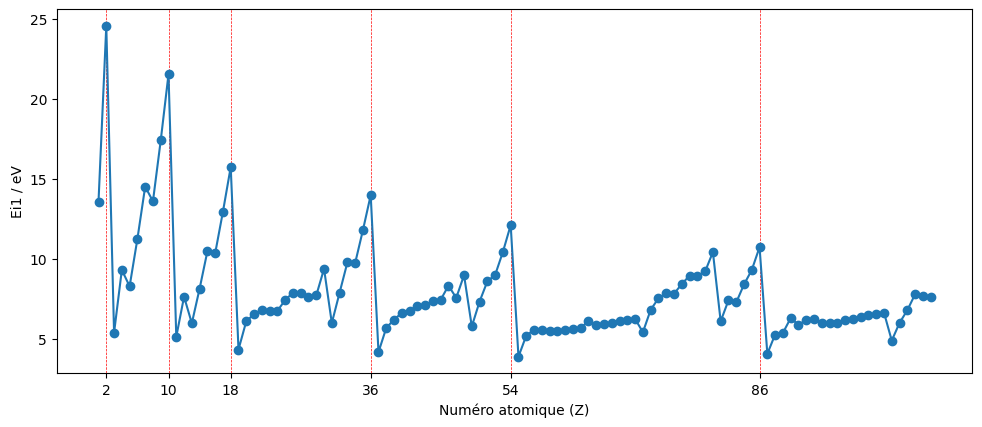

In [97]:
from matplotlib import pyplot as plt
Z = tp.elements["atomic_number"]
Ei1 = tp.elements["Ei1"]

cm2i = 1/2.54
fig, ax = plt.subplots(figsize=(30*cm2i,12*cm2i))
xticks=[2,10,18,36,54,86,118]
ax.set_xticks(xticks)
plt.grid(color='r', linestyle='--', linewidth=0.5, axis="x")

plt.plot(Z,Ei1,marker="o")
plt.xlabel("Numéro atomique (Z)")
plt.ylabel("Ei1 / eV")
plt.show()

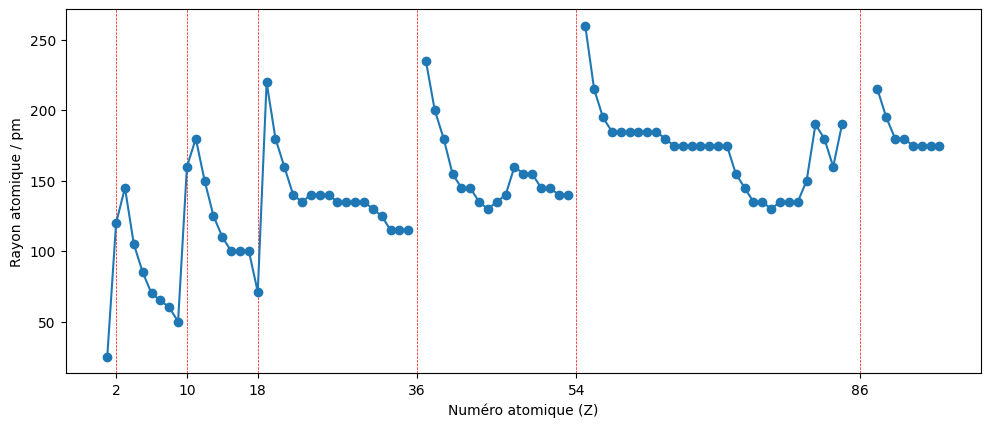

In [100]:
from matplotlib import pyplot as plt
Z = tp.elements["atomic_number"]
Rat = tp.elements["atomic_radius"]

cm2i = 1/2.54
fig, ax = plt.subplots(figsize=(30*cm2i,12*cm2i))
xticks=[2,10,18,36,54,86,118]
ax.set_xticks(xticks)
plt.grid(color='r', linestyle='--', linewidth=0.5, axis="x")

plt.plot(Z,Rat,marker="o")
plt.xlabel("Numéro atomique (Z)")
plt.ylabel("Rayon atomique / pm")
plt.show()